# Python Libraries for Data Science - `seaborn`

**Purpose:** The purpose of this workbook is to help you get comfortable with the topics outlined below.

**Prereqs**
* Python Fundamentals Workbook or a good grasp of basic Python
* Pandas Workbook or a good grasp of using pandas data structures
    
**Recomended Usage**
* Run each of the cells (Shift+Enter) and edit them as necessary to solidify your understanding
* Do any of the exercises that are relevant to helping you understand the material

**Topics Covered**
* Seaborn - data exploration and visualization

# Workbook Setup

In [3]:
# Reload all modules before executing a new line
%load_ext autoreload
%autoreload 2

# Abide by PEP8 code style
%load_ext pycodestyle_magic
%pycodestyle_on

# Plot all matplotlib plots in output cell and save on close
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [4]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
np.set_printoptions(threshold=5)

In [6]:
sns.set(style="darkgrid")

# [`seaborn`](https://seaborn.pydata.org/)

`seaborn` is a data visualization library based on matplotlib that allows you to make prettier and more complex graphics. Particularly useful when working with pandas data structures.

[Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html)

[Seaborn Docs](https://seaborn.pydata.org/api.html#api-ref)

## Seaborn Plotting

Seaborn supports relational, categorical, distribution, regression, and matrix plotting

We will go over some of the most common ones in each category so you will understand what they are. 

Then we will explore new datasets as if we were looking at the data for the first time and see what kinds of relationships we can find and what kinds of plots best show the information in the data.

In [8]:
# Load datasets
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')

#### Relational Plots

Plot the relationship between variables

```python
sns.relplot()
sns.scatterplot()
sns.lineplot()
```

The relationship between total bill and tip by day of the week.

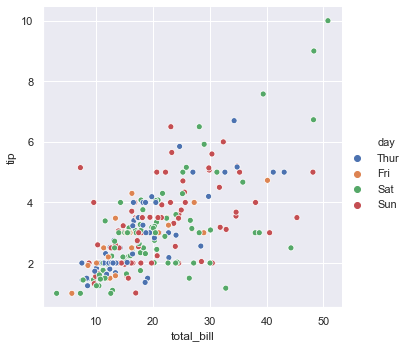

In [9]:
# Figure-level interface for drawing relational plots onto a FacetGrid
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)

The relationship between total bill and tip by meal time (Lunch, Dinner)

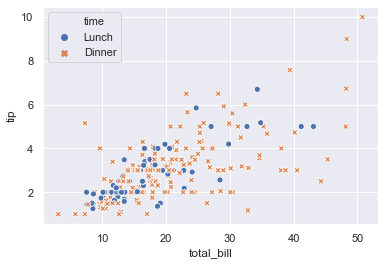

In [10]:
# Scatter plot with options for several semantic groupings
sns.scatterplot(x="total_bill", y="tip", hue="time", style="time", data=tips)

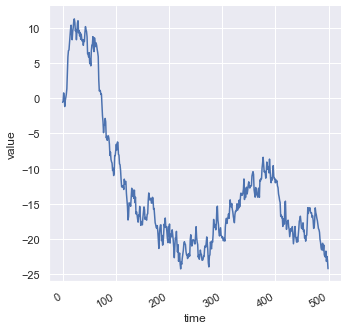

In [13]:
# Line plot
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

#### Categorical Plots

Explore the categorical trends in data.

```python
sns.catplot()
sns.stripplot()
sns.swarmplot()
sns.boxplot()
sns.violinplot()
sns.boxenplot()
sns.pointplot()
sns.barplot()
sns.countplot()
```

The survival rates of the titanic sinking based on sex and class.

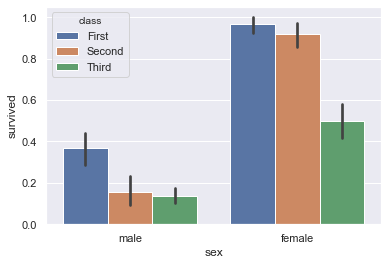

In [14]:
# Show point estimates and confidence intervals with scatterplot glyphs
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

The numbers of observations (datapoints) for each deck.

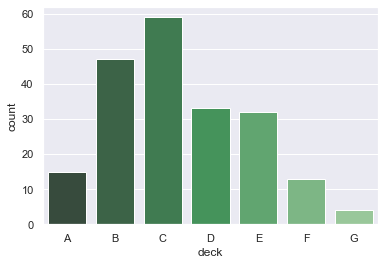

In [15]:
# Show count of observations
sns.countplot(x="deck", data=titanic, palette="Greens_d")

Distribution of males by age and whether they are alive.

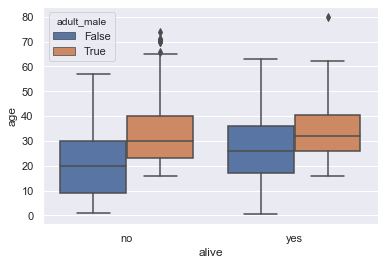

In [16]:
sns.boxplot(x="alive", y="age", hue="adult_male", data=titanic)

Petal length data categorized by species.

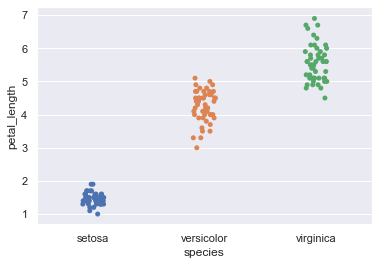

In [17]:
# Categorical scatterplot
sns.stripplot(x="species", y="petal_length", data=iris)

#### Distribution Plots

Show the distribution of data

```python
sns.jointplot()
sns.pairplot()
sns.distplot()
sns.kdeplot()
sns.rugplot()
```

Show the pairwise relationship between each categorical variable in the dataframe. In this case, categorized by species.

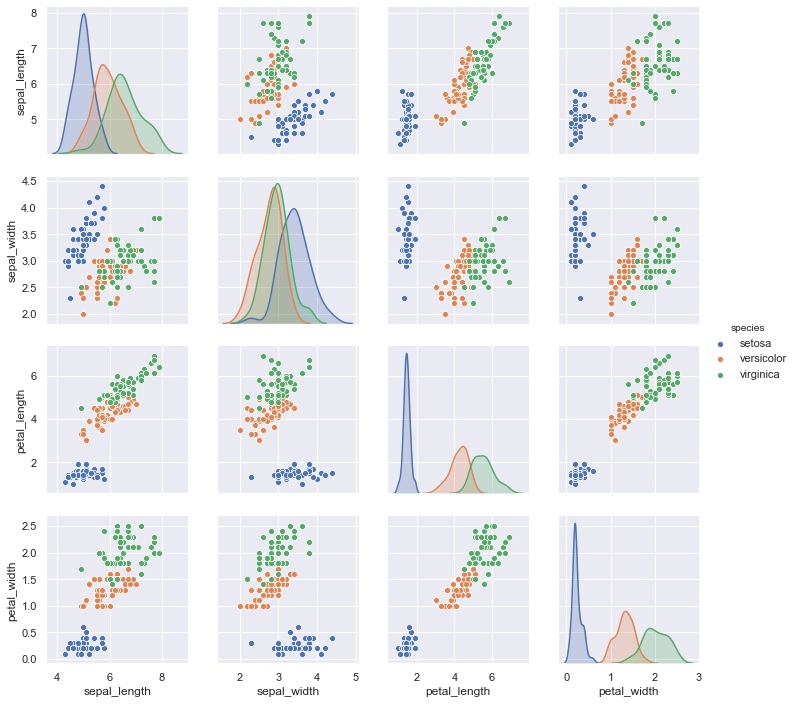

In [18]:
sns.pairplot(iris, hue='species')

Show the distribution of data along each axis.

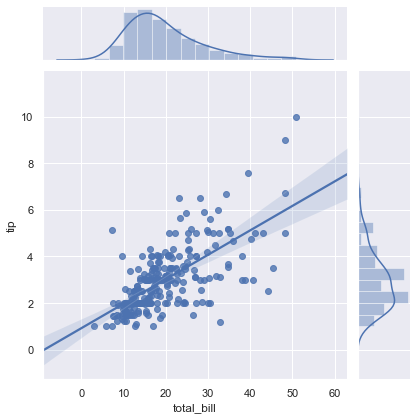

In [19]:
sns.jointplot("total_bill", "tip", data=tips, kind="reg")

#### Regression Plots

Visual analysis of relationships among variables; visual exploration of data patterns

```python
sns.lmplot()
sns.regplot()
sns.residplot()
```

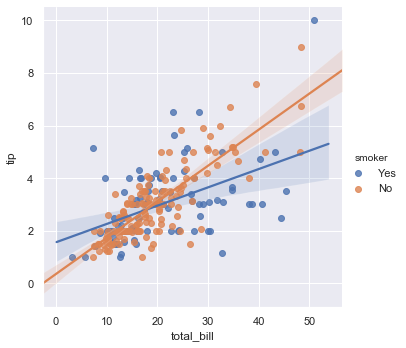

In [20]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

#### Matrix Plots

Color-coded grids with rows data, columns data, and values

```python
sns.heatmap()
sns.clustermap()
```

Heatmap of randomly generated data

In [21]:
uniform_data = np.random.rand(10, 12)

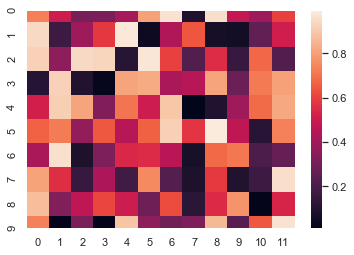

In [22]:
ax = sns.heatmap(uniform_data)

#### Grids of Multiple Plots

```python
sns.FacetGrid()
sns.PairGrid()
sns.JointGrid()
```

**FacetGrid Class:** Multi-plot grid for plotting conditional relationships.

The plot below shows how you can use the FacetGrid Class to plot total bill vs tip with colums as time (Lunch, Dinner)

The general workflow for FacetGrid is:

1) Initialize FacetGrid object

2) Use the FacetGrid.map() function to add your plotting functions.

3) Tweak plts as desired to change axis labels, etc.

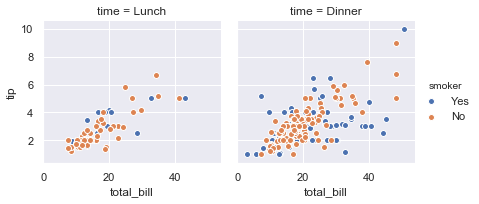

In [23]:
g = sns.FacetGrid(tips, col="time",  hue="smoker")
g = (g.map(plt.scatter, "total_bill", "tip", edgecolor="w")
     .add_legend())

**PairGrid:** Subplot grid for plotting pairwise relationships in a dataset.

This class maps each variable in a dataset onto a column and row in a grid of multiple axes. 

We can have different plots on different axes however using methods of the PairGrid Class (eg. `map_upper()`, `map_lower()`, `map_diag()`)

In [24]:
iris = sns.load_dataset('iris')

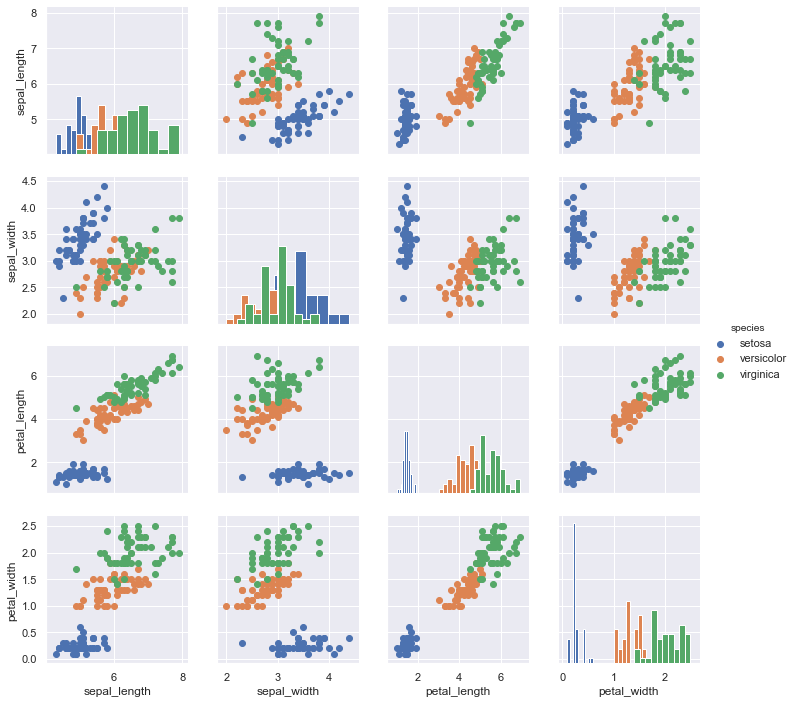

In [25]:
g = sns.PairGrid(iris, hue="species")
g = g.map_diag(plt.hist)  # plot histograms on the diagonal
g = g.map_offdiag(plt.scatter)  # plot scatterplots on the non-diagonals
g = g.add_legend()

**JointGrid:** Grid for drawing a bivariate plot with marginal univariate plots.

JointGrids allow us to draw plots with two variables alongside plots for each variable. You can see in the plot below. The total bill it plotted against tip (bivariate) and the distribution of the total bill (univariate) is plotted above and tip (univariate) is plotted to the right.

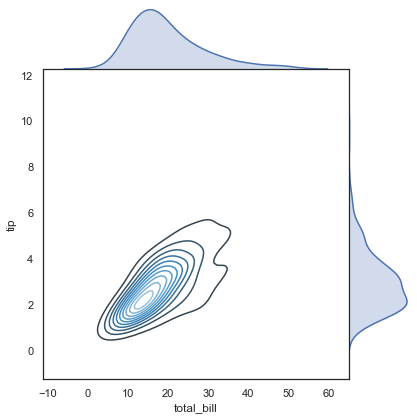

In [26]:
sns.set_style("white")  # makes it look slicker

g = sns.JointGrid(x="total_bill", y="tip", data=tips, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)

We will start by loading a few different datasets then go through examples of how we can use seaborn to visualize that is going on with our data.

## Exploring the titanic dataset

**Dataset Description:** The titanic dataset gives information on the passengers and survivers of the infamous titanic sinking.

In [34]:
titanic = sns.load_dataset('titanic')

In [35]:
# Check out the head of the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
# Checkout the datatypes we are working with
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [37]:
# Determine the unique embark_towns
embark_town = titanic['embark_town'].unique()

np.set_printoptions(threshold=np.inf)
print(embark_town)
np.set_printoptions(threshold=5)

['Southampton' 'Cherbourg' 'Queenstown' nan]


One thing that is always important to do it checkout where there is missing data and what the distribution of the data looks like so we can either fill the missing data in with 0s or perhaps drop the rows where there is missing data.

In [38]:
s1 = titanic.isna().sum()
s2 = titanic.count()
titanic_missing = pd.concat([s1, s2], axis=1,
                            keys=['missing', 'count']).transpose()
titanic_missing

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
missing,0,0,0,177,0,0,0,2,0,0,0,688,2,0,0
count,891,891,891,714,891,891,891,889,891,891,891,203,889,891,891


So it looks like we are missing some passenger ages, decks and embark town. Let's continue but keep that in mind as we explore the data.

I wonder that the distribution of passenger ages was on the titanic?

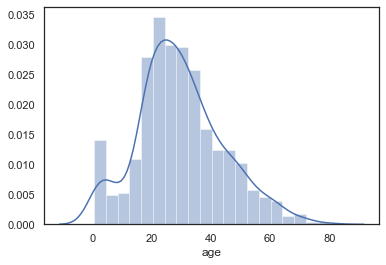

In [41]:
# Distribution of various columns
sns.distplot(titanic['age'].dropna())

We may want to inspect how many datapoints we have for each class of passenger.

[Text(0, 0, 'Third'), Text(0, 0, 'First'), Text(0, 0, 'Second')]

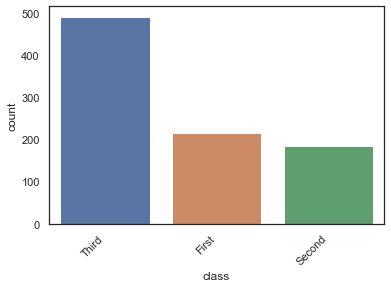

In [42]:
g = sns.countplot(x='class', data=titanic,
                  order=titanic['class'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right')

We can see that a majority of the passengers were third class. Again, thats something we want to keep in mind as get try and gather more information from the data.

Let's take a look at the relationship between class, age and survivors.

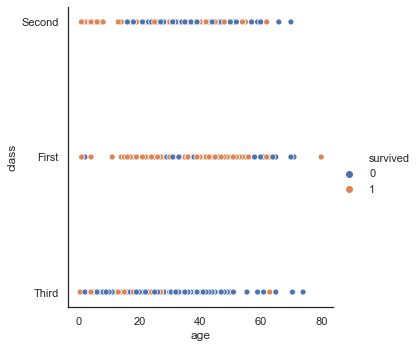

In [45]:
sns.relplot(x="age", y="class", hue="survived", data=titanic)

I am curious about the age difference by decks. Maybe there is some bias to how they assigned passengers decks. I would expect lower class passengers to have a lower deck.

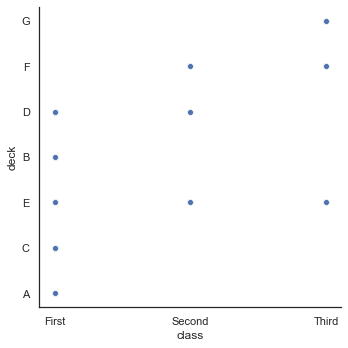

In [49]:
sns.relplot(x='class', y='deck', data=titanic.sort_values('class'))

There is much more information we can gather by exploring the titanic dataset. What other questions do you have about this dataset? How could you use Seaborn to help you see your answers?

# Exercises

Choose any TWO of the following datasets that interest you (that we haven't already worked with ideally) and explore the data in such a way that you could give a presentation on the information that can be gathered from it.

This will force you to go through the exercise of asking questions about data, then using what you've just learned to explore the data and find answers.

In [50]:
dataset_names = sns.get_dataset_names()
dataset_names

/usr/local/lib/python3.7/site-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /usr/local/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

# Appendix

## Troubleshooting Tips

Having trouble running the notebook?

If you run into issues running any of the code in this notebook, check your version of Jupyter and IPython as well as any extensions, libraries, etc.

```bash
!jupyter --version

jupyter core     : 4.6.1
jupyter-notebook : 6.0.2
qtconsole        : not installed
ipython          : 7.9.0
ipykernel        : 5.1.3
jupyter client   : 5.3.4
jupyter lab      : 1.2.3
nbconvert        : 5.6.1
ipywidgets       : not installed
nbformat         : 4.4.0
traitlets        : 4.3.3
```

In [6]:
# # Run this cell to check the version of Jupyter you are running
# !jupyter --version

In [2]:
# # Run one of these cells to check what extensions you are using
# !jupyter-labextension list
# !jupyter-nbextension list

In [1]:
# # Check ipython version
# import sys
# print(sys.version)

If you are still having issues, try restarting your kernel and/or reloading the notebook completely.